In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [7]:
df = pd.read_csv('/content/car_data.csv.csv')
df.columns = df.columns.str.strip()
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
df = pd.read_csv('/content/car_data.csv.csv')
df.columns = df.columns.str.strip()
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
# Drop 'Car_Name' as it's not useful for regression
df.drop(['Car_Name'], axis=1, inplace=True)

# Rename 'Driven_kms' to a more standard name
df.rename(columns={'Driven_kms': 'Kms_Driven', 'Selling_type': 'Seller_Type'}, inplace=True)

# Check for missing values
print(df.isnull().sum())


Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [11]:
le = LabelEncoder()

df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])          # e.g., Petrol=2, Diesel=0, CNG=1
df['Seller_Type'] = le.fit_transform(df['Seller_Type'])      # e.g., Dealer=0, Individual=1
df['Transmission'] = le.fit_transform(df['Transmission'])    # e.g., Manual=1, Automatic=0


In [12]:
# Features
X = df[['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

# Target variable
y = df['Selling_Price']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [15]:
y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


R² Score: 0.8466902419662664
Mean Squared Error: 3.5315798889713164


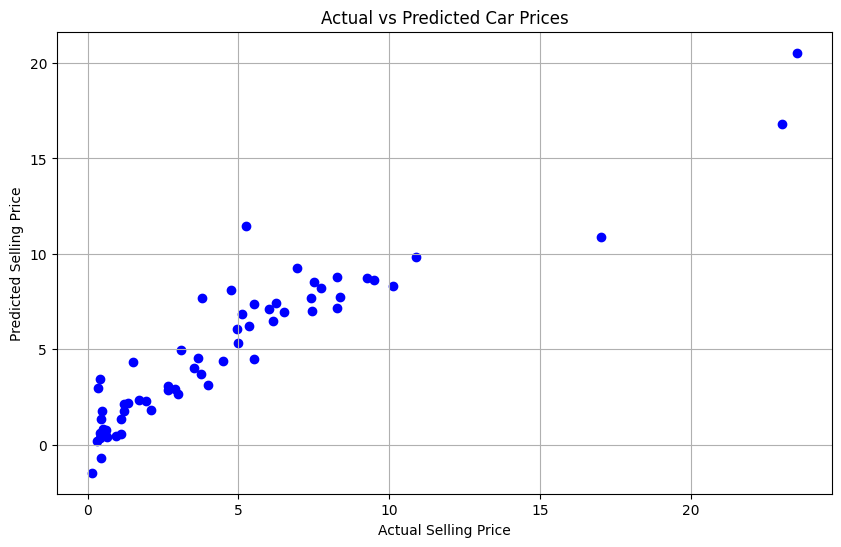

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, c='blue')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices")
plt.grid(True)
plt.show()


## ✅ Insights:

- The linear regression model was trained to predict used car prices.
- Features like `Present_Price`, `Kms_Driven`, and `Year` strongly influence price.
- R² score indicates how well the model fits the data (closer to 1 = better).
- Can be enhanced with models like RandomForest or XGBoost for better accuracy.

## 💼 Real-World Use:

Useful for platforms like OLX, Cars24, and CarDekho to estimate resale value based on car condition and features.
